In [ ]:
import pandas as pd
import numpy as n
import ROOT as R
import ctypes as ct
import math as mt
from array import array 
import sys

R.ROOT.EnableImplicitMT()

c1=R.TCanvas('c1','c1',900,700)
c1B=R.TCanvas('c1B','c1B',900,700)
c1F=R.TCanvas('c1F','c1F',900,700)



In [ ]:
#PLOTTING ALL DATA OVER FULL TIME RANGE (INTEGRATED AND PER CATEGORIES)

myNewFile = R.TFile.Open("dIstat_dttree_31marzo21_4Livia.root")
myNewTreeT = myNewFile.Get('dIstat')

dday=R.RooRealVar("dday", "dday", 0, 2250)
dday.setBins(2250)
dsex=R.RooRealVar("dsex", "dsex", 0, 1)
dcleta=R.RooRealVar("dcleta", "dclseta", 0, 21)
dreg=R.RooRealVar("dreg", "dreg", 1, 20)
ds=R.RooDataSet("ds", "ds", R.RooArgSet(dday,dcleta,dreg), R.RooFit.Import(myNewTreeT))
ds.get(20).Print("V")

dh=R.RooDataHist("dh","dh",R.RooArgSet(dday,dcleta,dreg),ds) 


xframe = dday.frame(R.RooFit.Name("xframe"), R.RooFit.Title("All categories"))
ds.plotOn(xframe,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlack))
#dh.plotOn(xframe,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlue))
c1.cd()
xframe.GetXaxis().SetTitle("Days from 1.1.15")
xframe.GetYaxis().SetTitle("Number of deaths / day")
xframe.Draw()
c1.Draw()
c1.SaveAs("Plots/Fits/ITALY.FullRangeOnlyData.png")

#### piemonte 1, v aosta 2, lombardia 3, trentino 4, 
####  veneto 5, friuli 6,  liguria 7, emilia 8, toscana 9, 
#### umbria 10,  marche 11, lazio 12, abruzzo 13, 
#### molise 14, campania 15, puglia 16, basilicata 17,
#### calabria 18, sicilia 19, sardegna 20
dsnord = ds.reduce(R.RooArgSet(dday,dcleta,dreg),"dreg==1 || dreg==2 || dreg==3 || dreg==4 || dreg==5 || dreg==6 || dreg==7 ||dreg==8") 
dscentro = ds.reduce(R.RooArgSet(dday,dcleta,dreg),"dreg==9 || dreg==10 || dreg==11 || dreg==12") 
dssud = ds.reduce(R.RooArgSet(dday,dcleta,dreg),"dreg==13 || dreg==14 || dreg==15 || dreg==16 || dreg==17 || dreg==18 || dreg==19 || dreg==20")
dhnord=R.RooDataHist("dhnord","dhnord",R.RooArgSet(dday,dcleta,dreg),dsnord) 
dhcentro=R.RooDataHist("dhcentro","dhcentro",R.RooArgSet(dday,dcleta,dreg),dscentro) 
dhsud=R.RooDataHist("dhsud","dhsud",R.RooArgSet(dday,dcleta,dreg),dssud)

xframenord = dday.frame(R.RooFit.Name("xframe"), R.RooFit.Title("All categories"))
dsnord.plotOn(xframenord,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlack))
#dh.plotOn(xframe,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlue))
c1.cd()
xframenord.GetXaxis().SetTitle("Days from 1.1.15")
xframenord.GetYaxis().SetTitle("Number of deaths / day")
xframenord.Draw()
c1.Draw()
c1.SaveAs("Plots/Fits/NORD.FullRangeOnlyData.png")

xframecentro = dday.frame(R.RooFit.Name("xframe"), R.RooFit.Title("All categories"))
dscentro.plotOn(xframecentro,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlack))
#dh.plotOn(xframe,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlue))
c1.cd()
xframecentro.GetXaxis().SetTitle("Days from 1.1.15")
xframecentro.GetYaxis().SetTitle("Number of deaths / day")
xframecentro.Draw()
c1.Draw()
c1.SaveAs("Plots/Fits/CENTRO.FullRangeOnlyData.png")

xframesud = dday.frame(R.RooFit.Name("xframe"), R.RooFit.Title("All categories"))
dssud.plotOn(xframesud,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlack))
#dh.plotOn(xframe,R.RooFit.DrawOption("L"),R.RooFit.LineColor(R.kBlue))
c1.cd()
xframesud.GetXaxis().SetTitle("Days from 1.1.15")
xframesud.GetYaxis().SetTitle("Number of deaths / day")
xframesud.Draw()
c1.Draw()
c1.SaveAs("Plots/Fits/SUD.FullRangeOnlyData.png")


In [ ]:
hdata =R.TH1F("hdata","hdata",2250,0,2250)
hdata = dh.createHistogram("hdata",dday,R.RooFit.Binning(2250,0,2250))
dhB=dh.reduce(dday,"dday>240 && dday<605 && dcleta<22")
hdataB=dhB.createHistogram("hdata",dday,R.RooFit.Binning(365,240,605))
hf2=R.TF1("hf2","[0]+[1]*cos((x+[2])*0.0172)",0,2250)
#hf2.SetParameters(1700,150,-30)
hdataB.Fit("hf2")
c1F.cd()
hdata.Draw("PE")
hdataB.SetMarkerColor(R.kBlue)
#hdataB.Draw("PE")
hf2.Draw("Lsame")
c1F.Draw()
c1F.SaveAs("Plots/Fits/ITALY.FullDataRangeAndBaseline_fromTH1.png")

hdatanord =R.TH1F("hdatanord","hdatanord",2250,0,2250)
hdatanord = dhnord.createHistogram("hdatanord",dday,R.RooFit.Binning(2250,0,2250))
dhBnord=dhnord.reduce(dday,"dday>240 && dday<605 && dcleta<22")
hdataBnord=dhBnord.createHistogram("hdataBnord",dday,R.RooFit.Binning(365,240,605))
hf2nord=R.TF1("hf2nord","[0]+[1]*cos((x+[2])*0.0172)",0,2250)
#hf2nord.SetParameters(1700,150,-2.85455e+01)
hf2nord.FixParameter(2,-2.85455e+01)
hdataBnord.Fit("hf2nord")
c1F.cd()
hdatanord.Draw("PE")
hdataBnord.SetMarkerColor(R.kBlue)
#hdataB.Draw("PE")
hf2nord.Draw("Lsame")
c1F.Draw()
c1F.SaveAs("Plots/Fits/NORD.FullDataRangeAndBaseline_fromTH1.png")

hdatacentro =R.TH1F("hdatacentro","hdatacentro",2250,0,2250)
hdatacentro = dhcentro.createHistogram("hdatacentro",dday,R.RooFit.Binning(2250,0,2250))
dhBcentro=dhcentro.reduce(dday,"dday>240 && dday<605 && dcleta<22")
hdataBcentro=dhBcentro.createHistogram("hdataBcentro",dday,R.RooFit.Binning(365,240,605))
hf2centro=R.TF1("hf2centro","[0]+[1]*cos((x+[2])*0.0172)",0,2250)
#hf2centro.SetParameters(1700,150,-2.85455e+01)
hf2centro.FixParameter(2,-2.85455e+01)
hdataBcentro.Fit("hf2centro")
c1F.cd()
hdatacentro.Draw("PE")
hdataBcentro.SetMarkerColor(R.kBlue)
#hdataB.Draw("PE")
hf2centro.Draw("Lsame")
c1F.Draw()
c1F.SaveAs("Plots/Fits/CENTRO.FullDataRangeAndBaseline_fromTH1.png")

hdatasud =R.TH1F("hdatasud","hdatasud",2250,0,2250)
hdatasud = dhsud.createHistogram("hdatasud",dday,R.RooFit.Binning(2250,0,2250))
dhBsud=dhsud.reduce(dday,"dday>240 && dday<605 && dcleta<22")
hdataBsud=dhBsud.createHistogram("hdataBsud",dday,R.RooFit.Binning(365,240,605))
hf2sud=R.TF1("hf2sud","[0]+[1]*cos((x+[2])*0.0172)",0,2250)
#hf2sud.SetParameters(1700,150,-2.85455e+01)
hf2sud.FixParameter(2,-2.85455e+01)
hdataBsud.Fit("hf2sud")
c1F.cd()
hdatasud.Draw("PE")
hdataBsud.SetMarkerColor(R.kBlue)
#hdataB.Draw("PE")
hf2sud.Draw("Lsame")
c1F.Draw()
c1F.SaveAs("Plots/Fits/SUD.FullDataRangeAndBaseline_fromTH1.png")

In [ ]:
#ITALY here i subtract baseline
from ROOT import gStyle
gStyle.SetOptStat(0)

hcost=R.TH1F("hcost","hcost",2250,0,2250)
for i in range(0,2250):
    hcost.SetBinContent(i+1,155*mt.cos((i-28.5)*0.0172)+1694)
hdata.Sumw2()
#hb.Sumw2()
hcost.Sumw2()
print("Data: ",dh.sumEntries()," h: ",hdata.Integral(), " hcost: ",hcost.Integral())

#######################################

hcostnord=R.TH1F("hcostnord","hcostnord",2250,0,2250)
for i in range(0,2250):
    hcostnord.SetBinContent(i,66.9*mt.cos((i-28.5)*0.0172)+791)
    
hdatanord.Sumw2()
#hbnord.Sumw2()
hcostnord.Sumw2()

#######################################

hcostcentro=R.TH1F("hcostcentro","hcostcentro",2250,0,2250)
for i in range(0,2250):
    hcostcentro.SetBinContent(i,25.5*mt.cos((i-28.5)*0.0172)+344)

hdatacentro.Sumw2()
#hbcentro.Sumw2()
hcostcentro.Sumw2()

#######################################

hcostsud=R.TH1F("hcostsud","hcostsud",2250,0,2250)
for i in range(0,2250):
    hcostsud.SetBinContent(i,6.15378e+01*mt.cos((i-28.5)*0.0172)+5.55675e+02)

hdatasud.Sumw2()
#hbsud.Sumw2()
hcostsud.Sumw2()


f = R.TFile("histos_ISTAT_4Livia.root", 'RECREATE')

hdata.Write()
#hb.Write()
hcost.Write()
hdatanord.Write()
#hbnord.Write()
hcostnord.Write()
hdatacentro.Write()
#hbcentro.Write()
hcostcentro.Write()
hdatasud.Write()
#hbsud.Write()
hcostsud.Write()

f.Write()
f.Close()

In [1]:
import pandas as pd
import numpy as n
import ROOT as R
import ctypes as ct
import math as mt
from array import array 
import sys

R.ROOT.EnableImplicitMT()

c1=R.TCanvas('c1','c1',900,700)
c1B=R.TCanvas('c1B','c1B',900,700)
c1F=R.TCanvas('c1F','c1F',900,700)

def smoothTH1(h):
    g = R.TGraph()
    #print("------------------> ",h.GetNbinsX())
    for i in range(1, h.GetNbinsX()):
        g.SetPoint(i-1, h.GetBinCenter(i), h.GetBinContent(i))
    smooth=R.TGraphSmooth()
    smoothed=smooth.SmoothKern(g,'normal',11)
    h1=R.TH1F()
    h1=h.Clone()
    for i in range(0,g.GetN()):
        h1.SetBinContent(i+1,smoothed.GetPointY(i))
   #     print(h1.GetBinContent(i+1),h.GetBinContent(i+1))
   # print(h1.GetNbinsX())
    print("----- smoothing finished -----")
    return h1
    

   

Welcome to JupyROOT 6.22/08


----- smoothing finished -----
gompertz:  54723.51649329814
dataInt:  55360.936279296875  dataErr:  613.1207578615351
PCInt:  38884.49607658386  PCErr:  197.19152131008033
diff:  16476.440202713013
totExcess:  55360.936279296875  totExcessErr:  c_double(613.1207578615351)
----- smoothing finished -----
TFile: name=histos_ISTAT_4Livia.root, title=, option=READ
 FCN=106.29 FROM MIGRAD    STATUS=CONVERGED     153 CALLS         154 TOTAL
                     EDM=1.56064e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.42904e+04   9.90629e+02   8.69213e-06   7.20690e-01
   2  p1           8.23867e-01   1.58855e-02   5.15282e-05   2.37522e-02
   3  p2           3.97362e-02   7.77251e-04   1.56513e-06   1.54202e+00
   4  p3           2.15441e+03   3.69844e-01   9.63307e-04   7.78600e-04


Info in <TCanvas::Print>: pdf file Plots/Fits/ITALY.FullRangeDataAndBaselineTH1SubtractedFIT.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/ITALY.FullRangeDataAndBaselineTH1SubtractedFIT.png has been created


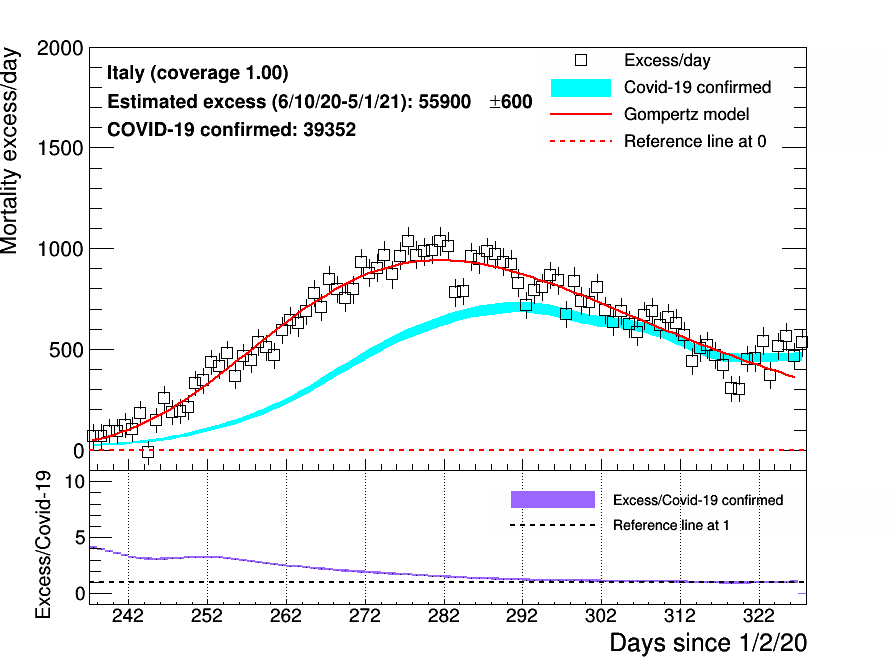

In [9]:
ff = R.TFile("histos_ISTAT_4Livia.root")
ff.Print()
hdata=ff.Get("hdata__dday")
hcost=ff.Get("hcost")

c1F.cd()
pad1=R.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetTicky()
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.2)
pad2.Draw()


pad1.cd()

hdata.GetXaxis().SetRangeUser(2105,2197)
hdata.SetTitle(" ")
hdata.Add(hcost,-1)
hdata.SetLineColor(R.kBlack)
hdata.SetMarkerColor(R.kBlack)
hdata.SetMarkerStyle(25)
hdata.SetMarkerSize(1.4)
hdata.GetYaxis().SetLabelFont(42)
hdata.GetYaxis().SetTitleFont(42)
hdata.GetYaxis().SetTitleOffset(1.05)
hdata.GetYaxis().SetTitleSize(1.5*hdata.GetYaxis().GetTitleSize())
hdata.GetYaxis().SetLabelSize(1.4*hdata.GetYaxis().GetLabelSize())


hdata.GetYaxis().SetTitle("Mortality excess/day")
hdata.GetXaxis().SetTitle("   ")
hdata.GetXaxis().SetRangeUser(2105,2196)
hdata.Draw("PEL")
line1=R.TLine(2105,0,2196,0)
line1.SetLineColor(R.kRed)
line1.SetLineStyle(7)
line1.SetLineWidth(2)
line1.Draw()


dgompertz= R.TF1('dgompertz','[0]*[1]*[2]*TMath::Exp(-[1]*TMath::Exp(-[2]*(x-[3]))-[2]*(x-[3]))',2105,2195)
dgompertz.SetParLimits(0,0,10000000)
dgompertz.SetParameter(0,2000)
dgompertz.SetParameter(3,2150)
dgompertz.SetParameter(2,0.1)
dgompertz.SetParameter(1,5)


hdata.GetYaxis().SetRangeUser(-100,2000)
hdata.Fit('dgompertz','R')
hdata.Draw("PELsame")
#hdata.GetYaxis().SetLabelSize(1.1*hdata.GetYaxis().GetLabelSize())
line1.Draw("same")
hdata.GetFunction('dgompertz').Draw("LSAME")

leg=R.TLegend(0.6,0.67,0.99,0.9)
leg.SetBorderSize(0)
leg.SetFillColorAlpha(0,0)
leg.SetTextSize(0.04)       
leg.AddEntry(hdata,'Excess/day ','P')

   
    

R.gStyle.SetOptStat(0)
f = R.TFile("histos_ProtezioneCivile_4Livia.root")
hpc_old=f.Get("h1_tot")
hpc=R.TH1F()
hpc=smoothTH1(hpc_old)
hpc.SetStats(0)
hpc.SetFillColor(R.kCyan)
hpc.SetLineColor(0)
totalExcessRescaledCovid=-999.
totalExcessRescaledCovid=hpc.Integral(2105-1880,2197-1880)

leg.AddEntry(hpc,'Covid-19 confirmed','F')
leg.AddEntry(dgompertz,'Gompertz model','L')
leg.AddEntry(line1,'Reference line at 0','L')
hpc.Draw("E3SAME")
hdata.Draw("PELsame")
line1.SetLineColor(R.kRed)
line1.Draw("same")
leg.Draw()



pad2.cd()
hratio=R.TH1F("hratio","hratio",2196,0,2196)    
for i in range(0,2196):
    if i<1880:
        hratio.SetBinContent(i,0)
        hratio.SetBinError(i,0)
    if i>=1880 and i<2196: 
        if hpc.GetBinContent(i-1880)==0:       
            hratio.SetBinContent(i,0)
            hratio.SetBinError(i,0)
        else:
            r=hdata.GetBinContent(i)/hpc.GetBinContent(i-1880)
            hratio.SetBinContent(i,r)
            hratio.SetBinError(i,0.1)
        
    if i>=2197:
        hratio.SetBinContent(i,0)
        hratio.SetBinError(i,0)
    
        
totalExcess=-999.
totalExcessErr=ct.c_double(-999.) 
dataErr=ct.c_double(-999.) 
hpcErr=ct.c_double(-999.) 

print("gompertz: ",dgompertz.Integral(2105,2196))
dataInt=hdata.IntegralAndError(2105,2196,dataErr)
hpcInt=hpc.IntegralAndError(2105-1880,2196-1880,hpcErr)
print("dataInt: ",dataInt," dataErr: ",dataErr.value)
print("PCInt: ",hpcInt," PCErr: ",hpcErr.value)
totalExcess=hdata.Integral(2105,2196)
print("diff: ",hdata.Integral(2105,2196)-hpc.Integral(2105-1880,2196-1880))
totalExcessErr.value=dataErr.value
print("totExcess: ", totalExcess," totExcessErr: ",totalExcessErr)

pad2.SetGridy(0)
pad2.SetGridx()

hratio.SetTitle("")
hratio.GetYaxis().SetLabelFont(42)
hratio.GetYaxis().SetTitleFont(42)
hratio.GetYaxis().SetTitleOffset(0.25)
hratio.GetYaxis().SetNdivisions(505)
hratio.GetYaxis().SetLabelSize(3.*hratio.GetXaxis().GetLabelSize())
hratio.GetYaxis().SetTitleSize(3.7*hratio.GetXaxis().GetTitleSize())
hratio.GetXaxis().SetLabelFont(42)
hratio.GetXaxis().SetTitleFont(42)
hratio.GetXaxis().SetTitleOffset(1)
hratio.GetXaxis().SetLabelSize(3.*hratio.GetXaxis().GetLabelSize())
hratio.GetYaxis().SetLabelSize(hdata.GetYaxis().GetLabelSize())
hratio.GetXaxis().SetTitleSize(4.*hratio.GetXaxis().GetTitleSize())
hratio.GetYaxis().SetTitle("Excess/Covid-19")
hratio.GetXaxis().SetRangeUser(2105,2196)
hratio.GetYaxis().SetRangeUser(-1,11)
hratio.SetFillColor(R.kViolet+6)
hratio.SetLineColor(0)

#htest=R.TH1F("htest","", 1000,2105,2197)
#htest.Draw()
hratio_new=R.TH1F()

hratio_new=smoothTH1(hratio)
hratio_new.Draw("E2")
hratio_new.GetXaxis().SetRangeUser(2105,2196)
for numBin in range(hratio_new.GetNbinsX()):
    hratio_new.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))
hratio_new.GetXaxis().SetLabelSize(2.5*hdata.GetYaxis().GetLabelSize())
hratio_new.GetYaxis().SetLabelSize(2.5*hdata.GetYaxis().GetLabelSize())
line2=R.TLine(2105,1,2196,1)
line2.SetLineColor(R.kBlack)
line2.SetLineStyle(7)
line2.SetLineWidth(2)
line2.Draw("same")

leg2=R.TLegend(0.55,0.6,1.09,0.9)
leg2.SetBorderSize(0)
leg2.SetFillColorAlpha(0,0)
leg2.SetTextSize(0.09) 
leg2.SetTextFont(42) 
leg2.AddEntry(hratio,'Excess/Covid-19 confirmed','F')
leg2.AddEntry(line2,'Reference line at 1','L')
leg2.Draw("same")

c1F.cd()
pad1.cd()
t=R.TLatex()
t.SetTextFont(62)
t.SetTextSize(0.045)


t1=t.Clone()
t1.SetTextSize(0.045)
t1.SetName('ExcessText')

#t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): %d#pm%d'%(totalExcess,totalExcessErr.value))    
t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): 55900#pm600')
t2=t.Clone()
t2.SetTextSize(0.045)
t2.SetName('CovidText')

t2.DrawLatexNDC(0.12,0.71,'COVID-19 confirmed: %.0f'%(totalExcessRescaledCovid))

t.SetName('Title')
t.SetTextSize(0.045)

t.DrawLatexNDC(0.12,0.83,'Italy (coverage 1.00)')

t3=t.Clone()
t3.SetTextSize(0.04)
t3.SetName('CovidText')

c1F.cd()  
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.03,'Days since 1/2/20')



c1F.SetBottomMargin(0.)
c1F.RedrawAxis()
c1F.Draw()    
c1F.SaveAs("Plots/Fits/ITALY.FullRangeDataAndBaselineTH1SubtractedFIT.pdf")
c1F.SaveAs("Plots/Fits/ITALY.FullRangeDataAndBaselineTH1SubtractedFIT.png")



----- smoothing finished -----
gompertz:  33218.00477539178
33736.32354736328
23644.804931640625
10091.518615722656
10025.772010803223
33736.32354736328 430.10193728072966
23644.804931640625 153.76867344046585
33736.32354736328 c_double(430.10193728072966)
----- smoothing finished -----
 FCN=83.0492 FROM MIGRAD    STATUS=CONVERGED     140 CALLS         141 TOTAL
                     EDM=3.27633e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.98725e+04   7.47517e+02  -1.66998e-06   8.21678e-02
   2  p1           9.32413e-01   2.01028e-02  -9.70284e-05   5.74259e-04
   3  p2           3.83220e-02   9.22823e-04   2.44504e-06   1.83680e-01
   4  p3           2.15407e+03   3.96064e-01  -7.12701e-04   2.12875e-05


Info in <TCanvas::Print>: pdf file Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT.png has been created


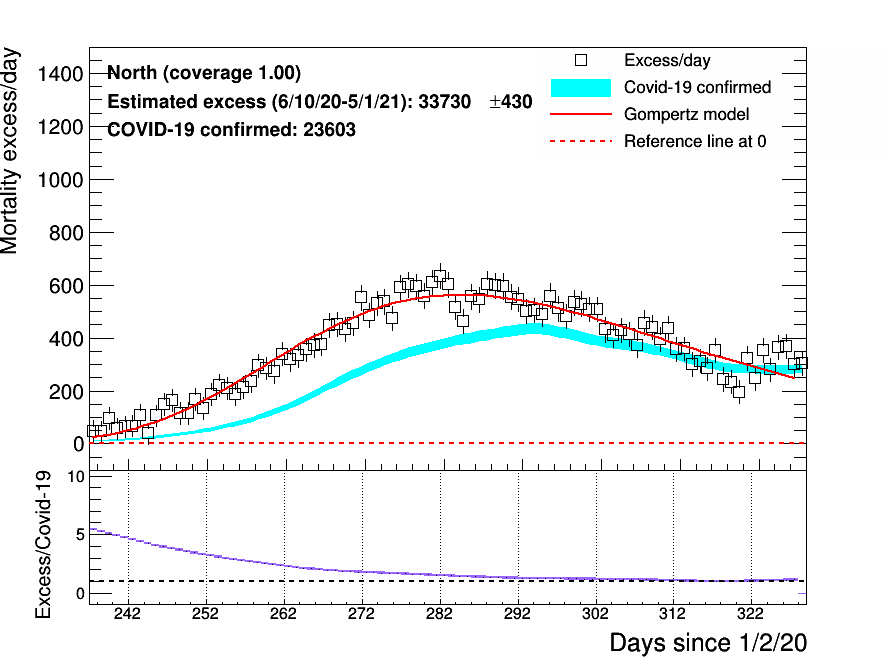

In [3]:
hdatanord=R.TH1F()
hdatanord=ff.Get("hdatanord__dday")
hcostnord=ff.Get("hcostnord")

c1F.cd()
pad1=R.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetTicky()
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.2)
pad2.Draw()


pad1.cd()

hdatanord.GetXaxis().SetRangeUser(2105,2197)
hdatanord.SetTitle(" ")
hdatanord.Add(hcostnord,-1)
hdatanord.SetLineColor(R.kBlack)
hdatanord.SetMarkerColor(R.kBlack)
hdatanord.SetMarkerStyle(25)
hdatanord.SetMarkerSize(1.4)
hdatanord.GetYaxis().SetTitleOffset(1.05)
hdatanord.GetXaxis().SetLabelFont(42)
hdatanord.GetXaxis().SetTitleFont(42)
hdatanord.GetXaxis().SetTitleOffset(1.3)
hdatanord.GetYaxis().SetTitleSize(1.5*hdatanord.GetYaxis().GetTitleSize())
hdatanord.GetXaxis().SetTitleSize(hdatanord.GetYaxis().GetTitleSize())
hdatanord.GetYaxis().SetLabelSize(1.4*hdatanord.GetYaxis().GetLabelSize())
hdatanord.GetXaxis().SetLabelSize(hdatanord.GetYaxis().GetLabelSize())


hdatanord.GetYaxis().SetTitle("Mortality excess/day")
hdatanord.GetXaxis().SetTitle("   ")
for numBin in range(hdatanord.GetNbinsX()):
    hdatanord.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))
hdatanord.GetXaxis().SetRangeUser(2105,2196)
hdatanord.Draw("PEL")
line1=R.TLine(2105,0,2196,0)
line1.SetLineColor(R.kRed)
line1.SetLineStyle(7)
line1.SetLineWidth(2)
line1.Draw()


dgompertz= R.TF1('dgompertz','[0]*[1]*[2]*TMath::Exp(-[1]*TMath::Exp(-[2]*(x-[3]))-[2]*(x-[3]))',2105,2195)
dgompertz.SetParLimits(0,0,10000000)
dgompertz.SetParameter(0,2000)
dgompertz.SetParameter(3,2150)
dgompertz.SetParameter(2,0.1)
dgompertz.SetParameter(1,5)


hdatanord.GetYaxis().SetRangeUser(-100,1500)
hdatanord.Fit('dgompertz','R')
hdatanord.Draw("PELsame")
#hdata.GetYaxis().SetLabelSize(1.1*hdata.GetYaxis().GetLabelSize())
line1.Draw("same")
hdatanord.GetFunction('dgompertz').Draw("LSAME")

leg=R.TLegend(0.6,0.67,0.99,0.9)
leg.SetBorderSize(0)
leg.SetFillColorAlpha(0,0)
leg.SetTextSize(0.04)          
leg.AddEntry(hdatanord,'Excess/day ','P')

    

R.gStyle.SetOptStat(0)
f = R.TFile("histos_ProtezioneCivile_4Livia.root")
hpcnord_old=f.Get("h1_nord")
totalExcessRescaledCovid=-999.
totalExcessRescaledCovid=hpcnord_old.Integral(2105-1880,2197-1880)
hpcnord=R.TH1F()
hpcnord=smoothTH1(hpcnord_old)
hpcnord.SetStats(0)
hpcnord.SetFillColor(R.kCyan)
hpcnord.SetLineColor(0)

leg.AddEntry(hpcnord,'Covid-19 confirmed','F')
leg.AddEntry(dgompertz,'Gompertz model','L')
leg.AddEntry(line1,'Reference line at 0','L')
   
hpcnord.Draw("E3SAME")
hdatanord.Draw("PELsame")
line1.SetLineColor(R.kRed)
line1.Draw("same")
leg.Draw()



pad2.cd()
hrationord=R.TH1F("hrationord","hrationord",2197,0,2197)    
for i in range(0,2197):
    if i<1880:
        hrationord.SetBinContent(i,0)
        hrationord.SetBinError(i,0)
    if i>=1880 and i<2197: 
        if hpcnord.GetBinContent(i-1880)==0:       
            hrationord.SetBinContent(i,0)
            hrationord.SetBinError(i,0)
        else:
            rnord=hdatanord.GetBinContent(i)/hpcnord.GetBinContent(i-1880)
            hrationord.SetBinContent(i,rnord)
            hrationord.SetBinError(i,0.1)
        
    if i>=2197:
        hrationord.SetBinContent(i,0)
        hrationord.SetBinError(i,0)
    
        
totalExcess=-999.
totalExcessErr=ct.c_double(-999.) 
dataErr=ct.c_double(-999.) 
hpcErr=ct.c_double(-999.) 
hdiffnord=R.TH1F("hdiffnord","hdiffnord",2197,0,2197)

for i in range(0,2197):   
    if i<1880:
        hdiffnord.SetBinContent(i,0)
        hdiffnord.SetBinError(i,0)
    if i>=1880 and i<2197 :       
        diffnord=hdatanord.GetBinContent(i)-hpcnord.GetBinContent(i-1880)
        hdiffnord.SetBinContent(i,diffnord)
        hdiffnord.SetBinError(i,0.1)
    if i>=2197:
        hdiffnord.SetBinContent(i,0)
        hdiffnord.SetBinError(i,0)
   # print(i-1880,diff)
print("gompertz: ",dgompertz.Integral(2105,2197))
print(hdatanord.Integral(2105,2197))
print(hpcnord.Integral(2105-1880,2197-1880))
print(hdatanord.Integral(2105,2197)-hpcnord.Integral(2105-1880,2197-1880))
print(hdiffnord.Integral(2105,2197))
dataInt=hdatanord.IntegralAndError(2105,2197,dataErr)
hpcInt=hpcnord.IntegralAndError(2105-1880,2197-1880,hpcErr)
print(dataInt,dataErr.value)
print(hpcInt,hpcErr.value)
totalExcess=hdatanord.Integral(2105,2197)
totalExcessErr.value=dataErr.value
print(totalExcess,totalExcessErr)

pad2.SetGridy(0)
pad2.SetGridx()
hrationord.SetTitle("")
hrationord.GetYaxis().SetLabelFont(42)
hrationord.GetYaxis().SetTitleFont(42)
hrationord.GetYaxis().SetTitleOffset(0.25)
hrationord.GetYaxis().SetNdivisions(505)
hrationord.GetYaxis().SetLabelSize(3.*hrationord.GetXaxis().GetLabelSize())
hrationord.GetYaxis().SetTitleSize(3.7*hrationord.GetXaxis().GetTitleSize())
hrationord.GetXaxis().SetLabelFont(42)
hrationord.GetXaxis().SetTitleFont(42)
hrationord.GetXaxis().SetTitleOffset(1)
hrationord.GetXaxis().SetLabelSize(3.*hrationord.GetXaxis().GetLabelSize())
hrationord.GetXaxis().SetTitleSize(4.*hrationord.GetXaxis().GetTitleSize())
hrationord.GetYaxis().SetTitle("Excess/Covid-19")
hrationord.GetXaxis().SetRangeUser(2105,2197)
hrationord.GetYaxis().SetRangeUser(-1,10.5)
hrationord.SetFillColor(R.kViolet+6)
hrationord.SetLineColor(0)

hrationord_new=R.TH1F()
hrationord_new=smoothTH1(hrationord)
hrationord_new.GetXaxis().SetRangeUser(2105,2197)
hrationord_new.Draw("E2")
for numBin in range(hrationord_new.GetNbinsX()):
    hrationord_new.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))
    
line2=R.TLine(2105,1,2197,1)
line2.SetLineColor(R.kBlack)
line2.SetLineStyle(7)
line2.SetLineWidth(2)
line2.Draw("same")

c1F.cd()
pad1.cd()
t=R.TLatex()
t.SetTextFont(62)
t.SetTextSize(0.045)


t1=t.Clone()
t1.SetTextSize(0.045)
t1.SetName('ExcessText')

#t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): %d#pm %d'%(totalExcess,totalExcessErr.value))    
t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): 33730#pm430') 
t2=t.Clone()
t2.SetTextSize(0.045)
t2.SetName('CovidText')

t2.DrawLatexNDC(0.12,0.71,'COVID-19 confirmed: %.0f'%(totalExcessRescaledCovid))

t.SetName('Title')
t.SetTextSize(0.045)

t.DrawLatexNDC(0.12,0.83,'North (coverage 1.00)')

t3=t.Clone()
t3.SetTextSize(0.04)
t3.SetName('CovidText')

c1F.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.03,'Days since 1/2/20')
    


c1F.SetBottomMargin(0.)
c1F.RedrawAxis()
c1F.Draw()    
c1F.SaveAs("Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT.pdf")
c1F.SaveAs("Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT.png")





Info in <TCanvas::Print>: pdf file Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png has been created


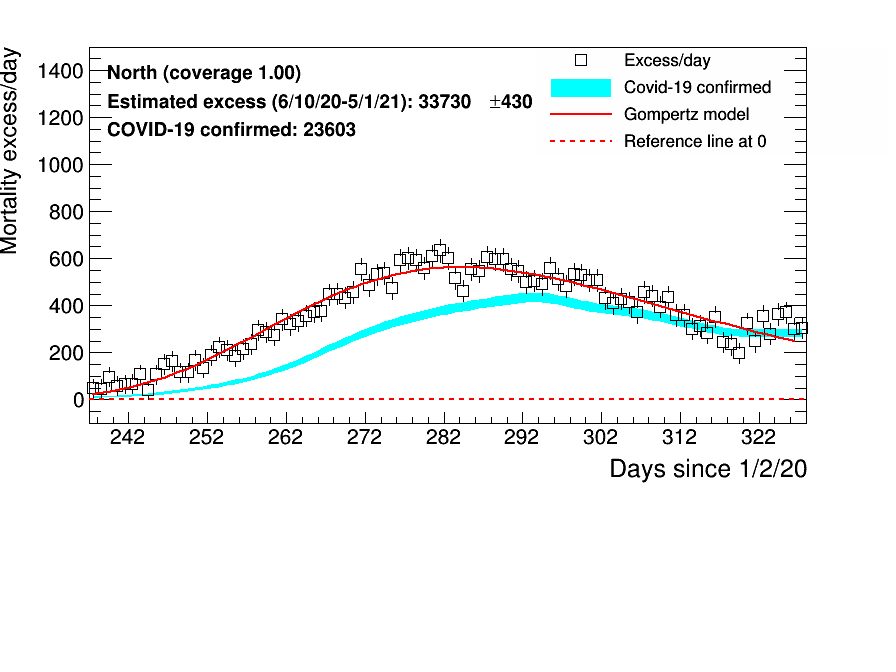

In [4]:

#draw only pad1
c1B.cd()
hdatanord.GetXaxis().SetRangeUser(2105,2196)
hdatanord.Draw("pesame")
pad1.SetBottomMargin(-0.05)
pad1.SetTicky()
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(-0.05)  # joins upper and lower plot
pad2.SetBottomMargin(0.5)
pad2.Draw()
c1B.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.29,'Days since 1/2/20')
c1B.Draw()

c1B.SaveAs("Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf")
c1B.SaveAs("Plots/Fits/NORD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png")


----- smoothing finished -----
8840.778137207031
6790.825437545776
2049.952699661255
2035.312958240509
8840.778137207031 272.75854131959454
6790.825437545776 82.40646478005094
8840.778137207031 c_double(272.75854131959454)
----- smoothing finished -----
 FCN=57.1664 FROM MIGRAD    STATUS=CONVERGED     164 CALLS         165 TOTAL
                     EDM=1.17103e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.57178e+03   3.88917e+02  -9.68062e-06  -5.63982e-01
   2  p1           6.61695e-01   4.33254e-02  -8.30435e-05   9.84306e-03
   3  p2           4.29057e-02   2.23261e-03   1.75050e-05   5.89498e-02
   4  p3           2.15399e+03   1.10927e+00  -1.54511e-03   2.80044e-04


Info in <TCanvas::Print>: pdf file Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT.png has been created


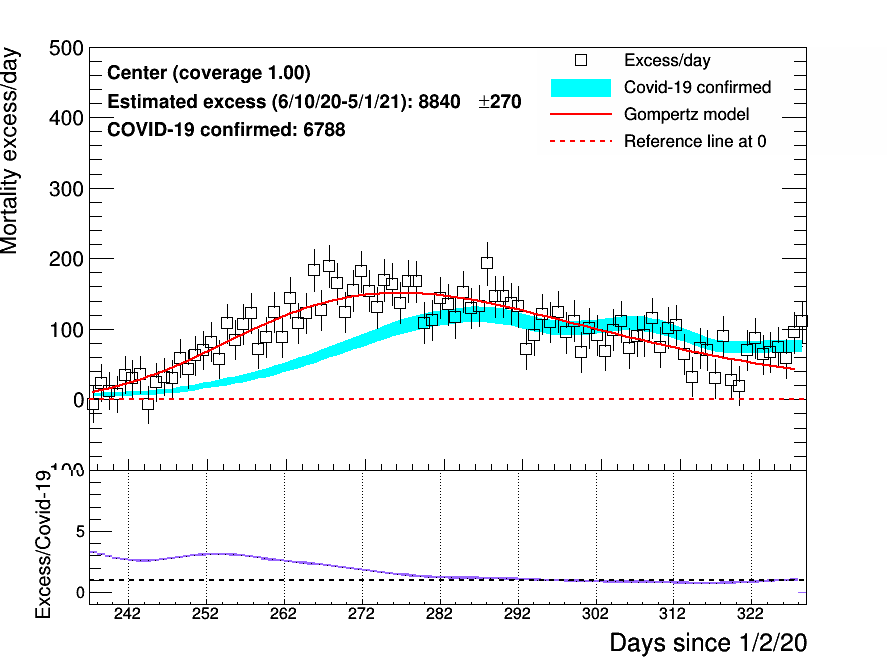

In [5]:
hdatacentro=R.TH1F()
hdatacentro=ff.Get("hdatacentro__dday")
hcostcentro=ff.Get("hcostcentro")

c1F.cd()
pad1=R.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetTicky()
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.2)
pad2.Draw()


pad1.cd()

hdatacentro.GetXaxis().SetRangeUser(2105,2197)
hdatacentro.SetTitle(" ")
hdatacentro.Add(hcostcentro,-1)
hdatacentro.SetLineColor(R.kBlack)
hdatacentro.SetMarkerColor(R.kBlack)
hdatacentro.SetMarkerStyle(25)
hdatacentro.SetMarkerSize(1.4)
hdatacentro.GetYaxis().SetTitleOffset(1.05)
hdatacentro.GetXaxis().SetLabelFont(42)
hdatacentro.GetXaxis().SetTitleFont(42)
hdatacentro.GetXaxis().SetTitleOffset(1.3)
hdatacentro.GetYaxis().SetTitleSize(1.5*hdatacentro.GetYaxis().GetTitleSize())
hdatacentro.GetXaxis().SetTitleSize(hdatacentro.GetYaxis().GetTitleSize())
hdatacentro.GetYaxis().SetLabelSize(1.4*hdatacentro.GetYaxis().GetLabelSize())
hdatacentro.GetXaxis().SetLabelSize(hdatacentro.GetYaxis().GetLabelSize())

hdatacentro.GetYaxis().SetTitle("Mortality excess/day")
hdatacentro.GetXaxis().SetTitle("   ")
for numBin in range(hdatacentro.GetNbinsX()):
    hdatacentro.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))
hdatacentro.GetXaxis().SetRangeUser(2105,2196)
hdatacentro.Draw("PEL")
line1=R.TLine(2105,0,2196,0)
line1.SetLineColor(R.kRed)
line1.SetLineStyle(7)
line1.SetLineWidth(2)
line1.Draw()


dgompertz= R.TF1('dgompertz','[0]*[1]*[2]*TMath::Exp(-[1]*TMath::Exp(-[2]*(x-[3]))-[2]*(x-[3]))',2105,2195)
dgompertz.SetParLimits(0,0,10000000)
dgompertz.SetParameter(0,2000)
dgompertz.SetParameter(3,2150)
dgompertz.SetParameter(2,0.1)
dgompertz.SetParameter(1,5)


hdatacentro.GetYaxis().SetRangeUser(-100,500)
hdatacentro.Fit('dgompertz','R')
hdatacentro.Draw("PELsame")
#hdata.GetYaxis().SetLabelSize(1.1*hdata.GetYaxis().GetLabelSize())
line1.Draw("same")
hdatacentro.GetFunction('dgompertz').Draw("LSAME")

leg=R.TLegend(0.6,0.67,0.99,0.9)
leg.SetBorderSize(0)
leg.SetFillColorAlpha(0,0)
leg.SetTextSize(0.04)       
leg.AddEntry(hdatacentro,'Excess/day ','P')

   
    

R.gStyle.SetOptStat(0)
f = R.TFile("histos_ProtezioneCivile_4Livia.root")
hpccentro_old=f.Get("h1_centro")
totalExcessRescaledCovid=-999.
totalExcessRescaledCovid=hpccentro_old.Integral(2105-1880,2197-1880)
hpccentro=R.TH1F()
hpccentro=smoothTH1(hpccentro_old)
hpccentro.SetStats(0)
hpccentro.SetFillColor(R.kCyan)
hpccentro.SetLineColor(0)

leg.AddEntry(hpccentro,'Covid-19 confirmed','F')
leg.AddEntry(dgompertz,'Gompertz model','L')
leg.AddEntry(line1,'Reference line at 0','L')
hpccentro.Draw("E3SAME")
hdatacentro.Draw("PELsame")
line1.SetLineColor(R.kRed)
line1.Draw("same")
leg.Draw()



pad2.cd()
hratiocentro=R.TH1F("hratiocentro","hratiocentro",2197,0,2197)    
for i in range(0,2197):
    if i<1880:
        hratiocentro.SetBinContent(i,0)
        hratiocentro.SetBinError(i,0)
    if i>=1880 and i<2197: 
        if hpccentro.GetBinContent(i-1880)==0:       
            hratiocentro.SetBinContent(i,0)
            hratiocentro.SetBinError(i,0)
        else:
            rcentro=hdatacentro.GetBinContent(i)/hpccentro.GetBinContent(i-1880)
            hratiocentro.SetBinContent(i,rcentro)
            hratiocentro.SetBinError(i,0.1)
        
    if i>=2197:
        hratiocentro.SetBinContent(i,0)
        hratiocentro.SetBinError(i,0)
    
        
totalExcess=-999.
totalExcessErr=ct.c_double(-999.) 
dataErr=ct.c_double(-999.) 
hpcErr=ct.c_double(-999.) 
hdiffcentro=R.TH1F("hdiffcentro","hdiffcentro",2197,0,2197)

for i in range(0,2197):   
    if i<1880:
        hdiffcentro.SetBinContent(i,0)
        hdiffcentro.SetBinError(i,0)
    if i>=1880 and i<2197 :       
        diffcentro=hdatacentro.GetBinContent(i)-hpccentro.GetBinContent(i-1880)
        hdiffcentro.SetBinContent(i,diffcentro)
        hdiffcentro.SetBinError(i,0.1)
    if i>=2197:
        hdiffcentro.SetBinContent(i,0)
        hdiffcentro.SetBinError(i,0)
   # print(i-1880,diff)

print(hdatacentro.Integral(2105,2197))
print(hpccentro.Integral(2105-1880,2197-1880))
print(hdatacentro.Integral(2105,2197)-hpccentro.Integral(2105-1880,2197-1880))
print(hdiffcentro.Integral(2105,2197))
dataInt=hdatacentro.IntegralAndError(2105,2197,dataErr)
hpcInt=hpccentro.IntegralAndError(2105-1880,2197-1880,hpcErr)
print(dataInt,dataErr.value)
print(hpcInt,hpcErr.value)
totalExcess=hdatacentro.Integral(2105,2197)
totalExcessErr.value=dataErr.value
print(totalExcess,totalExcessErr)

pad2.SetGridy(0)
pad2.SetGridx()
hratiocentro.SetTitle("")
hratiocentro.GetYaxis().SetLabelFont(42)
hratiocentro.GetYaxis().SetTitleFont(42)
hratiocentro.GetYaxis().SetTitleOffset(0.25)
hratiocentro.GetYaxis().SetNdivisions(505)
hratiocentro.GetYaxis().SetLabelSize(3.*hratiocentro.GetXaxis().GetLabelSize())
hratiocentro.GetYaxis().SetTitleSize(3.7*hratiocentro.GetXaxis().GetTitleSize())
hratiocentro.GetXaxis().SetLabelFont(42)
hratiocentro.GetXaxis().SetTitleFont(42)
hratiocentro.GetXaxis().SetTitleOffset(1)
hratiocentro.GetXaxis().SetLabelSize(3.*hratiocentro.GetXaxis().GetLabelSize())
hratiocentro.GetXaxis().SetTitleSize(4.*hratiocentro.GetXaxis().GetTitleSize())
hratiocentro.GetYaxis().SetTitle("Excess/Covid-19")
hratiocentro.GetXaxis().SetRangeUser(2105,2197)
hratiocentro.GetYaxis().SetRangeUser(-1,10)
hratiocentro.SetFillColor(R.kViolet+6)
hratiocentro.SetLineColor(0)

hratiocentro_new=R.TH1F()
hratiocentro_new=smoothTH1(hratiocentro)
for numBin in range(hratiocentro_new.GetNbinsX()):
    hratiocentro_new.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))

hratiocentro_new.Draw("E2")

line2=R.TLine(2105,1,2197,1)
line2.SetLineColor(R.kBlack)
line2.SetLineStyle(7)
line2.SetLineWidth(2)
line2.Draw("same")

c1F.cd()
pad1.cd()
t=R.TLatex()
t.SetTextFont(62)
t.SetTextSize(0.045)


t1=t.Clone()
t1.SetTextSize(0.045)
t1.SetName('ExcessText')

#t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): %d#pm %d'%(totalExcess,totalExcessErr.value))    
t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): 8840#pm270') 
t2=t.Clone()
t2.SetTextSize(0.045)
t2.SetName('CovidText')

t2.DrawLatexNDC(0.12,0.71,'COVID-19 confirmed: %.0f'%(totalExcessRescaledCovid))

t.SetName('Title')
t.SetTextSize(0.045)

t.DrawLatexNDC(0.12,0.83,'Center (coverage 1.00)')

t3=t.Clone()
t3.SetTextSize(0.04)
t3.SetName('CovidText')

c1F.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.03,'Days since 1/2/20')
    


c1F.SetBottomMargin(0.)
c1F.RedrawAxis()
c1F.Draw()    
c1F.SaveAs("Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT.pdf")
c1F.SaveAs("Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT.png")

Info in <TCanvas::Print>: pdf file Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png has been created


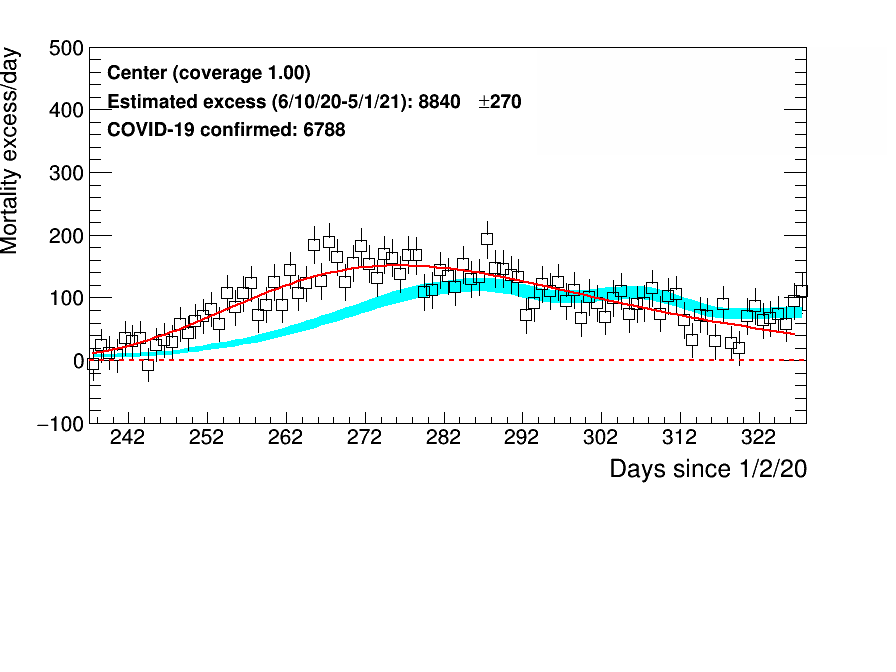

In [6]:

#draw only pad1
c1B.cd()
hdatacentro.GetXaxis().SetRangeUser(2105,2196)
hdatacentro.Draw("pesame")
leg.Clear()
pad1.SetBottomMargin(-0.05)
pad1.SetTicky()
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(-0.05)  # joins upper and lower plot
pad2.SetBottomMargin(0.5)
pad2.Draw()
c1B.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.29,'Days since 1/2/20')
c1B.Draw()



c1B.SaveAs("Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf")
c1B.SaveAs("Plots/Fits/CENTRO.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png")

----- smoothing finished -----
13451.87744140625
8916.163973331451
4535.713468074799
4546.804434776306
13451.87744140625 347.27816308917807
8916.163973331451 94.42544134570646
13451.87744140625 c_double(347.27816308917807)
----- smoothing finished -----
 FCN=91.4201 FROM MIGRAD    STATUS=CONVERGED     125 CALLS         126 TOTAL
                     EDM=2.6175e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.48026e+04   4.86937e+02  -2.46592e-06   1.91549e-01
   2  p1           7.50415e-01   3.12846e-02   4.92103e-05  -1.03574e-02
   3  p2           4.33971e-02   1.78801e-03   6.95283e-07  -6.01147e-02
   4  p3           2.15315e+03   7.55002e-01   8.52478e-04  -3.36341e-04


Info in <TCanvas::Print>: pdf file Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT.png has been created


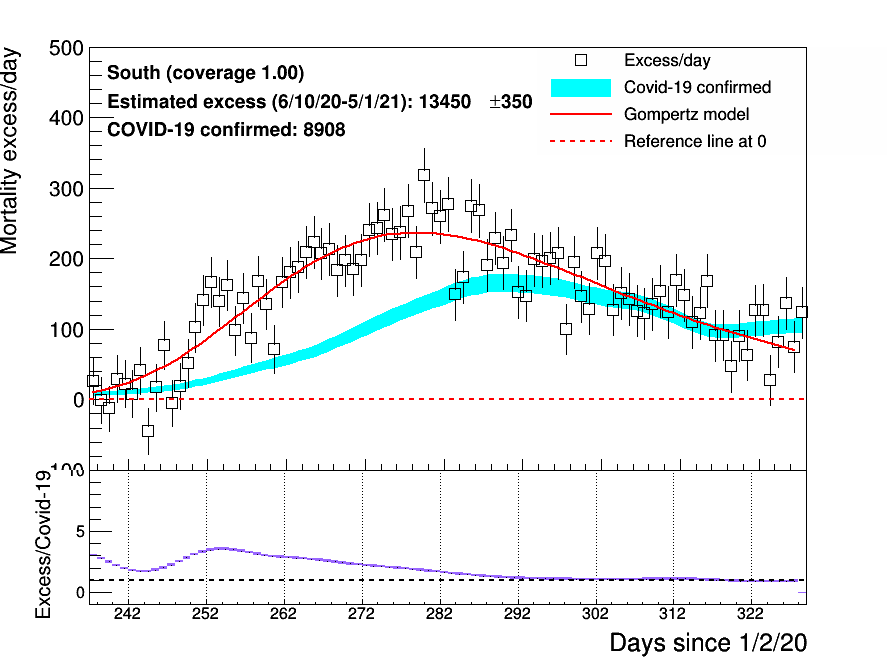

In [7]:
hdatasud=R.TH1F()
hdatasud=ff.Get("hdatasud__dday")
hcostsud=ff.Get("hcostsud")

c1F.cd()
pad1=R.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.2)
pad2.Draw()


pad1.cd()

hdatasud.GetXaxis().SetRangeUser(2105,2197)
hdatasud.SetTitle(" ")
hdatasud.Add(hcostsud,-1)
hdatasud.SetLineColor(R.kBlack)
hdatasud.SetMarkerColor(R.kBlack)
hdatasud.SetMarkerStyle(25)
hdatasud.SetMarkerSize(1.4)
hdatasud.GetYaxis().SetTitleOffset(1.05)
hdatasud.GetXaxis().SetLabelFont(42)
hdatasud.GetXaxis().SetTitleFont(42)
hdatasud.GetXaxis().SetTitleOffset(1.3)
hdatasud.GetYaxis().SetTitleSize(1.5*hdatasud.GetYaxis().GetTitleSize())
hdatasud.GetXaxis().SetTitleSize(hdatasud.GetYaxis().GetTitleSize())
hdatasud.GetYaxis().SetLabelSize(1.4*hdatasud.GetYaxis().GetLabelSize())
hdatasud.GetXaxis().SetLabelSize(hdatasud.GetYaxis().GetLabelSize())

hdatasud.GetYaxis().SetTitle("Mortality excess/day")
hdatasud.GetXaxis().SetTitle("   ")
for numBin in range(hdatasud.GetNbinsX()):
    hdatasud.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))
hdatasud.GetXaxis().SetRangeUser(2105,2196)
hdatasud.Draw("PEL")
line1=R.TLine(2105,0,2196,0)
line1.SetLineColor(R.kRed)
line1.SetLineStyle(7)
line1.SetLineWidth(2)
line1.Draw()


dgompertz= R.TF1('dgompertz','[0]*[1]*[2]*TMath::Exp(-[1]*TMath::Exp(-[2]*(x-[3]))-[2]*(x-[3]))',2105,2195)
dgompertz.SetParLimits(0,0,10000000)
dgompertz.SetParameter(0,2000)
dgompertz.SetParameter(3,2150)
dgompertz.SetParameter(2,0.1)
dgompertz.SetParameter(1,5)


hdatasud.GetYaxis().SetRangeUser(-100,500)
hdatasud.Fit('dgompertz','R')
hdatasud.Draw("PELsame")
#hdata.GetYaxis().SetLabelSize(1.1*hdata.GetYaxis().GetLabelSize())
line1.Draw("same")
hdatasud.GetFunction('dgompertz').Draw("LSAME")

leg=R.TLegend(0.6,0.67,0.99,0.9)
leg.SetBorderSize(0)
leg.SetFillColorAlpha(0,0)
leg.SetTextSize(0.04)          
leg.AddEntry(hdatasud,'Excess/day ','P')

   
    

R.gStyle.SetOptStat(0)
f = R.TFile("histos_ProtezioneCivile_4Livia.root")
hpcsud_old=f.Get("h1_sud")
totalExcessRescaledCovid=-999.
totalExcessRescaledCovid=hpcsud_old.Integral(2105-1880,2197-1880)
hpcsud=R.TH1F()
hpcsud=smoothTH1(hpcsud_old)
hpcsud.SetStats(0)
hpcsud.SetFillColor(R.kCyan)
hpcsud.SetLineColor(0)

leg.AddEntry(hpcsud,'Covid-19 confirmed','F')
leg.AddEntry(dgompertz,'Gompertz model','L')
leg.AddEntry(line1,'Reference line at 0','L')
hpcsud.Draw("E3SAME")
hdatasud.Draw("PELsame")
line1.SetLineColor(R.kRed)
line1.Draw("same")
leg.Draw()



pad2.cd()
hratiosud=R.TH1F("hratiosud","hratiosud",2197,0,2197)    
for i in range(0,2197):
    if i<1880:
        hratiosud.SetBinContent(i,0)
        hratiosud.SetBinError(i,0)
    if i>=1880 and i<2197: 
        if hpcsud.GetBinContent(i-1880)==0:       
            hratiosud.SetBinContent(i,0)
            hratiosud.SetBinError(i,0)
        else:
            rsud=hdatasud.GetBinContent(i)/hpcsud.GetBinContent(i-1880)
            hratiosud.SetBinContent(i,rsud)
            hratiosud.SetBinError(i,0.1)
        
    if i>=2197:
        hratiosud.SetBinContent(i,0)
        hratiosud.SetBinError(i,0)
    
        
totalExcess=-999.
totalExcessErr=ct.c_double(-999.) 
dataErr=ct.c_double(-999.) 
hpcErr=ct.c_double(-999.) 
hdiffsud=R.TH1F("hdiffsud","hdiffsud",2197,0,2197)

for i in range(0,2197):   
    if i<1880:
        hdiffsud.SetBinContent(i,0)
        hdiffsud.SetBinError(i,0)
    if i>=1880 and i<2197 :       
        diffsud=hdatasud.GetBinContent(i)-hpcsud.GetBinContent(i-1880)
        hdiffsud.SetBinContent(i,diffsud)
        hdiffsud.SetBinError(i,0.1)
    if i>=2197:
        hdiffsud.SetBinContent(i,0)
        hdiffsud.SetBinError(i,0)
   # print(i-1880,diff)

print(hdatasud.Integral(2105,2197))
print(hpcsud.Integral(2105-1880,2197-1880))
print(hdatasud.Integral(2105,2197)-hpcsud.Integral(2105-1880,2197-1880))
print(hdiffsud.Integral(2105,2197))
dataInt=hdatasud.IntegralAndError(2105,2197,dataErr)
hpcInt=hpcsud.IntegralAndError(2105-1880,2197-1880,hpcErr)
print(dataInt,dataErr.value)
print(hpcInt,hpcErr.value)
totalExcess=hdatasud.Integral(2105,2197)
totalExcessErr.value=dataErr.value
print(totalExcess,totalExcessErr)

pad2.SetGridy(0)
pad2.SetGridx()
hratiosud.SetTitle("")
hratiosud.GetYaxis().SetLabelFont(42)
hratiosud.GetYaxis().SetTitleFont(42)
hratiosud.GetYaxis().SetTitleOffset(0.25)
hratiosud.GetYaxis().SetNdivisions(505)
hratiosud.GetYaxis().SetLabelSize(3.*hratiosud.GetXaxis().GetLabelSize())
hratiosud.GetYaxis().SetTitleSize(3.7*hratiosud.GetXaxis().GetTitleSize())
hratiosud.GetXaxis().SetLabelFont(42)
hratiosud.GetXaxis().SetTitleFont(42)
hratiosud.GetXaxis().SetTitleOffset(1)
hratiosud.GetXaxis().SetLabelSize(3.*hratiosud.GetXaxis().GetLabelSize())
hratiosud.GetXaxis().SetTitleSize(4.*hratiosud.GetXaxis().GetTitleSize())
hratiosud.GetYaxis().SetTitle("Excess/Covid-19")
hratiosud.GetXaxis().SetRangeUser(2105,2197)
hratiosud.GetYaxis().SetRangeUser(-1,10)
hratiosud.SetFillColor(R.kViolet+6)
hratiosud.SetLineColor(0)

hratiosud_new=R.TH1F()
hratiosud_new=smoothTH1(hratiosud)
for numBin in range(hratiosud_new.GetNbinsX()):
    hratiosud_new.GetXaxis().ChangeLabel(numBin+1, -1,-1,-1,-1,-1,str(242+(numBin*10)))

hratiosud_new.Draw("E2")

line2=R.TLine(2105,1,2197,1)
line2.SetLineColor(R.kBlack)
line2.SetLineStyle(7)
line2.SetLineWidth(2)
line2.Draw("same")

c1F.cd()
pad1.cd()
t=R.TLatex()
t.SetTextFont(62)
t.SetTextSize(0.045)


t1=t.Clone()
t1.SetTextSize(0.045)
t1.SetName('ExcessText')

#t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): %d#pm %d'%(totalExcess,totalExcessErr.value))   
t1.DrawLatexNDC(0.12,0.77,'Estimated excess (6/10/20-5/1/21): 13450#pm350')   

t2=t.Clone()
t2.SetTextSize(0.045)
t2.SetName('CovidText')

t2.DrawLatexNDC(0.12,0.71,'COVID-19 confirmed: %.0f'%(totalExcessRescaledCovid))

t.SetName('Title')
t.SetTextSize(0.045)

t.DrawLatexNDC(0.12,0.83,'South (coverage 1.00)')

t3=t.Clone()
t3.SetTextSize(0.04)
t3.SetName('CovidText')

c1F.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.03,'Days since 1/2/20')
    


c1F.SetBottomMargin(0.)
c1F.RedrawAxis()
c1F.Draw()    
c1F.SaveAs("Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT.pdf")
c1F.SaveAs("Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT.png")

Info in <TCanvas::Print>: pdf file Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf has been created
Info in <TCanvas::Print>: png file Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png has been created


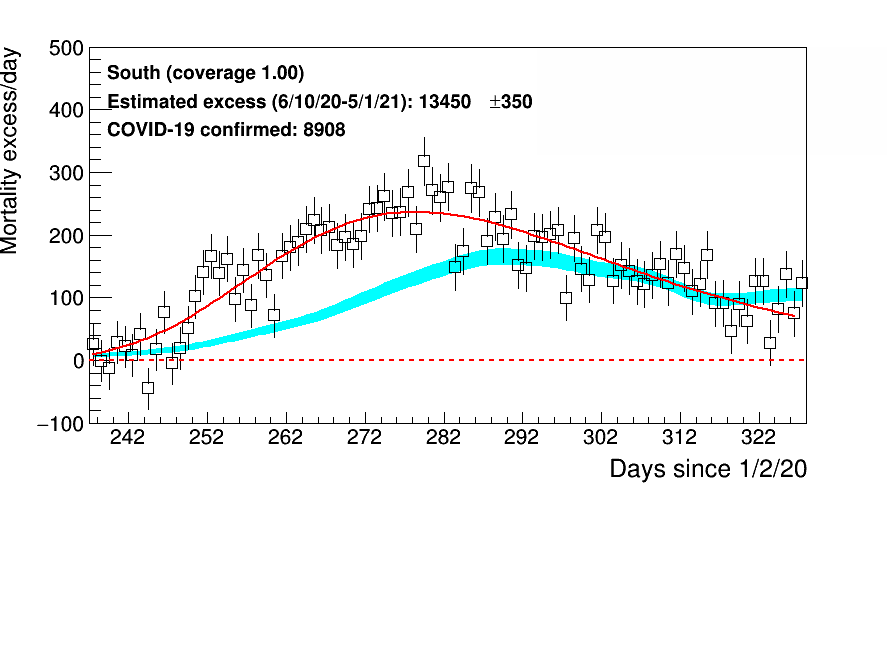

In [8]:

#draw only pad1
c1B.cd()
hdatasud.GetXaxis().SetRangeUser(2105,2196)
hdatasud.Draw("pesame")
leg.Clear()
pad1.SetBottomMargin(-0.05)
pad1.Draw()
pad2 = R.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(-0.-5)  # joins upper and lower plot
pad2.SetBottomMargin(0.5)
pad2.Draw()
c1B.cd()
t3.SetTextFont(42)
t3.DrawLatexNDC(0.68,0.29,'Days since 1/2/20')
c1B.Draw()



c1B.SaveAs("Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.pdf")
c1B.SaveAs("Plots/Fits/SUD.FullRangeDataAndBaselineTH1SubtractedFIT_noRATIO.png")